resized to image of shape (315, 315, 3)
uint8
uint8


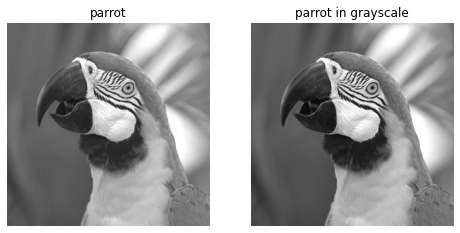

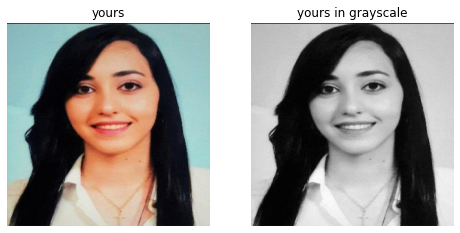

In [1]:
#Imports we need to use.
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import math
import cmath 
import scipy
 
# QUESTION 2:
# part 2.a creating the input an image of a building
# display the Original image, and its gray scale, using unit8.

# Take a yours image 315X315.
parrot_image = cv2.imread(os.path.join(".","../given_data","parrot.png"))

# convert the image to gray scale mode.
parrot_image_rgb = cv2.cvtColor(parrot_image, cv2.COLOR_BGR2RGB)
parrot_grayscale = cv2.cvtColor(parrot_image,cv2.COLOR_BGR2GRAY)
# make sure uint8.
parrot_image.shape , parrot_image.dtype
parrot_grayscale.shape,parrot_grayscale.dtype


# display images
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(parrot_image_rgb)
ax.set_title("parrot")
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(parrot_grayscale, cmap='gray')
ax.set_title("parrot in grayscale")
ax.set_axis_off()


# Take a yours image 315X315.

yours_image = cv2.imread(os.path.join(".","../my_data","yours.jpg"))


image_height, image_width, image_num_channels = parrot_image.shape


# Resize it as the shape of the parrot image.
yours_resized = cv2.resize(yours_image, (image_width,image_height ))
print("resized to image of shape", yours_resized.shape)


# convert the image to gray scale mode.
yours_image_rgb = cv2.cvtColor(yours_resized, cv2.COLOR_BGR2RGB)
yours_grayscale = cv2.cvtColor(yours_resized,cv2.COLOR_BGR2GRAY)
# make sure uint8.
yours_image.shape , yours_image.dtype
yours_grayscale.shape,yours_grayscale.dtype


# display images
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(yours_image_rgb)
ax.set_title("yours")
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(yours_grayscale, cmap='gray')
ax.set_title("yours in grayscale")
ax.set_axis_off()

print(yours_resized.dtype)
print(parrot_grayscale.dtype)


Text(0, 0.5, 'v')

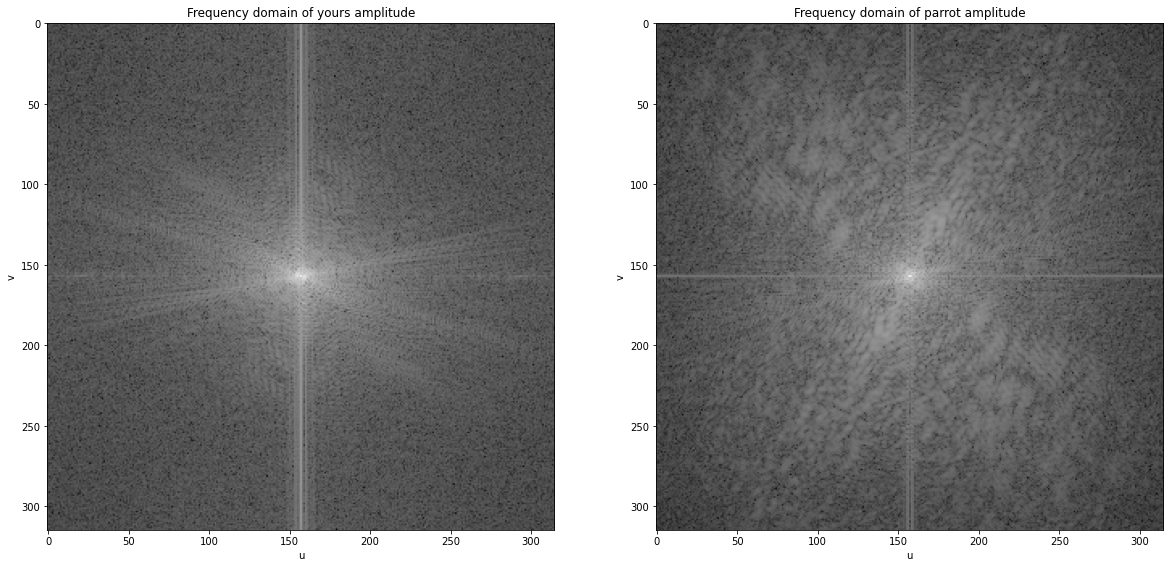

In [2]:
# part 2.b Amplitude and phase of input.

#yours_grayscale amplitude and phase
fft_yours = np.fft.fft2(yours_grayscale)
yours_phase = np.angle(fft_yours)
yours_amplitude = np.abs(fft_yours)
fft_yours_amp_shifted = np.fft.fftshift(yours_amplitude)
fft_yours_ph_shifted = np.fft.fftshift(yours_phase)


#parrot_grayscale amplitude and and phase
fft_parrot = np.fft.fft2(parrot_grayscale)
parrot_phase = np.angle(fft_parrot)
parrot_amplitude = np.abs(fft_parrot)
fft_parrot_amp_shifted = np.fft.fftshift(parrot_amplitude)
fft_parrot_ph_shifted = np.fft.fftshift(parrot_phase)


# Plot of amplitude only images  - frequency domain of yours  
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(np.log(1+np.abs(fft_yours_amp_shifted)), cmap='gray')
ax.set_title("Frequency domain of yours amplitude")
ax.set_xlabel("u")
ax.set_ylabel("v")

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(np.log(1+np.abs(fft_parrot_amp_shifted)), cmap='gray')
ax.set_title("Frequency domain of parrot amplitude")
ax.set_xlabel("u")
ax.set_ylabel("v")


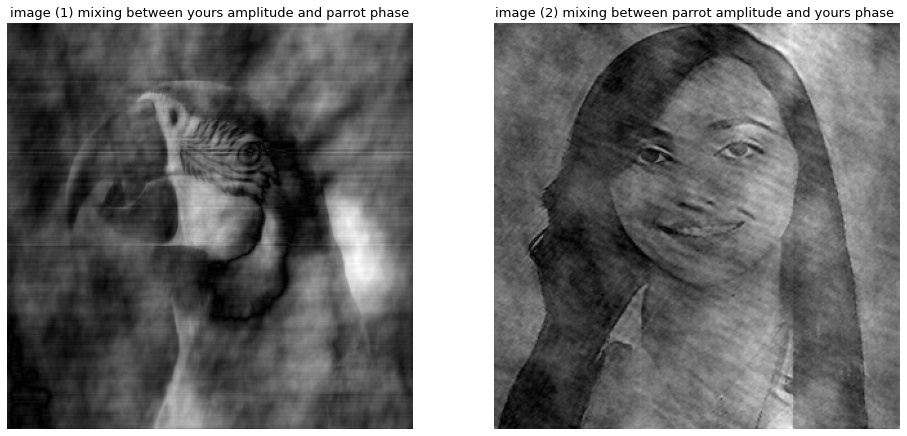

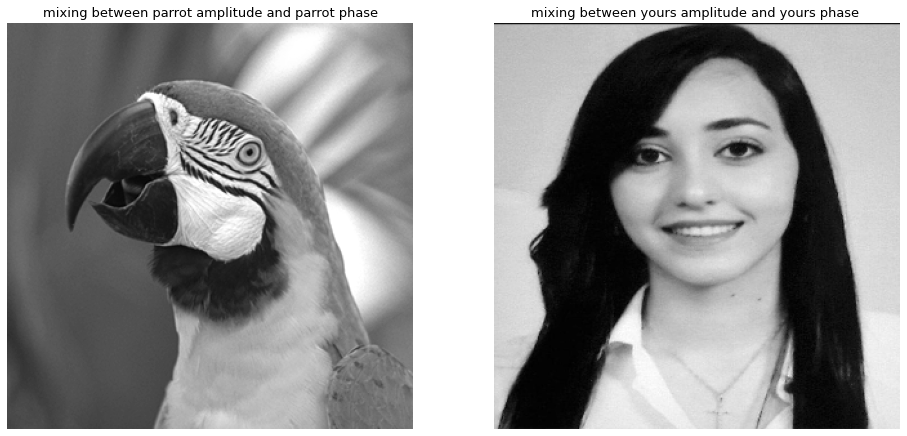

In [3]:
# part 2.c Mixing thing up.


Mix1=np.zeros(parrot_phase.shape,dtype='complex128')
Mix2=np.zeros(parrot_phase.shape,dtype='complex128')
Mix3=np.zeros(parrot_phase.shape,dtype='complex128')#self check
Mix4=np.zeros(parrot_phase.shape,dtype='complex128')#self check



for row in range(parrot_phase.shape[0]):
    for column in range(parrot_phase.shape[1]):
        Mix1[row,column] = yours_amplitude[row,column]*cmath.exp(complex(0,1)*parrot_phase[row,column])
        Mix2[row,column] = parrot_amplitude[row,column]*cmath.exp(complex(0,1)*yours_phase[row,column])
        Mix3[row,column] = parrot_amplitude[row,column]*cmath.exp(complex(0,1)*parrot_phase[row,column])#self check
        Mix4[row,column] = yours_amplitude[row,column]*cmath.exp(complex(0,1)*yours_phase[row,column])#self check

        
Mix1_ifft = np.fft.ifftshift(Mix1)
Mix1_filtered = np.fft.ifft2(Mix1_ifft)

Mix2_ifft = np.fft.ifftshift(Mix2)
Mix2_filtered = np.fft.ifft2(Mix2_ifft)

Mix3_ifft = np.fft.ifftshift(Mix3)     ##self check
Mix3_filtered = np.fft.ifft2(Mix3_ifft)##self check

Mix4_ifft = np.fft.ifftshift(Mix4)     ##self check
Mix4_filtered = np.fft.ifft2(Mix4_ifft)##self check


# plot  images
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(abs(Mix1_filtered), cmap='gray')
ax.set_title("image (1) mixing between yours amplitude and parrot phase",fontsize = 13)
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(abs(Mix2_filtered),cmap='gray')
ax.set_title("image (2) mixing between parrot amplitude and yours phase ", fontsize = 13)
ax.set_axis_off()

####### not required in Hw  report ####### self checks images##
#parrot mixing with itslef
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(abs(Mix3_filtered), cmap='gray')
ax.set_title("mixing between parrot amplitude and parrot phase",fontsize = 13)
ax.set_axis_off()
#yours mixing with itslef
ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(abs(Mix4_filtered),cmap='gray')
ax.set_title("mixing between yours amplitude and yours phase ", fontsize = 13)
ax.set_axis_off()



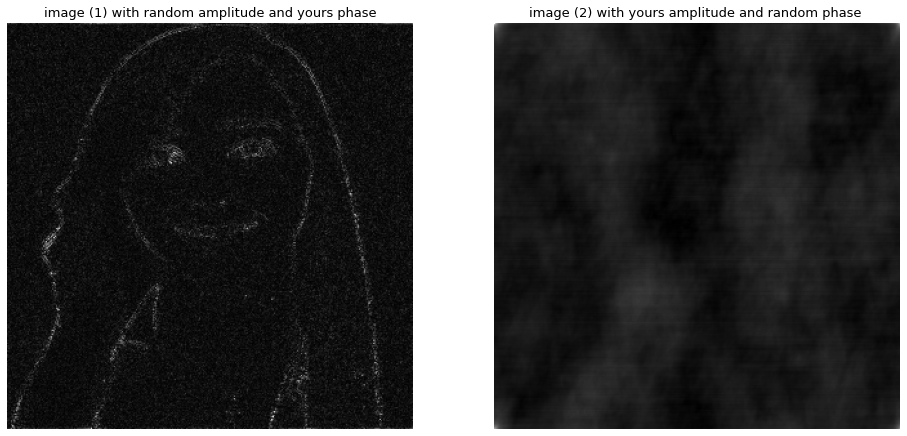

In [4]:
# part 2.d - let's be random

Mix5 = np.zeros(parrot_phase.shape,dtype='float64')
Mix6 = np.zeros(parrot_phase.shape,dtype='float64')  
rand_amp_pic = np.zeros(parrot_phase.shape,dtype='complex128')
rand_ph_pic  = np.zeros(parrot_phase.shape,dtype='complex128')

#random amp
min_Amplitude = 0
max_Amplitude = 1

for i in range(Mix5.shape[0]):
    for j in range(Mix5.shape[1]):
        Mix5[i][j] = max_Amplitude*np.random.random(1)+min_Amplitude*(np.random.random(1)-1)
        rand_amp_pic[i,j] = Mix5[i,j]*cmath.exp(complex(0,1)*yours_phase[i,j])

rand_amp_pic2 = np.fft.ifftshift(rand_amp_pic)
rand_amp_pic_filtered = np.fft.ifft2(rand_amp_pic2)

# random phase
min_phase=yours_phase.min()
max_phase=yours_phase.max()
for i in range(Mix6.shape[0]):
    for j in range(Mix6.shape[1]):
        Mix6[i][j]=max_phase*np.random.random(1)+min_phase*(np.random.random(1)-1)
        rand_ph_pic[i,j]=yours_amplitude[i,j]*cmath.exp(complex(0,1)*Mix6[i,j])


rand_phase_pic1 = np.fft.ifftshift(rand_ph_pic)
rand_phase_pic_filtered = np.fft.ifft2(rand_phase_pic1)


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(abs(rand_amp_pic_filtered), cmap='gray')
ax.set_title("image (1) with random amplitude and yours phase",fontsize = 13)
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(abs(rand_phase_pic_filtered),cmap='gray')
ax.set_title("image (2) with yours amplitude and random phase ", fontsize = 13)
ax.set_axis_off()
